# Step 3: Exploratory Data Analysis (EDA) with SQL

I will explore the cleaned dataset using SQL queries and visualizations to answer key project questions.

## 3.1: Setup and Imports

In [1]:
import pandas as pd
import yaml
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

sns.set(style="whitegrid")

## 3.2: Load Data and Set Up SQL Engine

In [2]:
# Load config file
with open('../config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

# Load the cleaned dataset
INTERIM_DATA_PATH = os.path.join('..', config['data_paths']['interim'])
WRANGLED_DATA_FILE = os.path.join(INTERIM_DATA_PATH, config['data_files']['wrangled_data'])
df = pd.read_csv(WRANGLED_DATA_FILE)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create an in-memory SQLite database
engine = create_engine('sqlite://', echo=False)
df.to_sql('launches', con=engine, index=False, if_exists='replace')

print("Data loaded and SQLite engine created.")
df.head()

Data loaded and SQLite engine created.


,flight_number,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,class
0,1,2006-03-24 22:30:00+00:00,FalconSat,20.000000,LEO,5e9e4502f5090995de566f86,False,1.0,False,False,False,0
1,2,2007-03-21 01:10:00+00:00,DemoSat,7842.388855,LEO,5e9e4502f5090995de566f86,False,1.0,False,False,False,0
2,3,2008-08-03 03:34:00+00:00,Trailblazer,7842.388855,LEO,5e9e4502f5090995de566f86,False,1.0,False,False,False,0
3,4,2008-09-28 23:15:00+00:00,RatSat,165.000000,LEO,5e9e4502f5090995de566f86,False,1.0,False,False,False,0
4,5,2009-07-13 03:35:00+00:00,RazakSat,200.000000,LEO,5e9e4502f5090995de566f86,False,1.0,False,False,False,0


### Q1: What is the overall landing success rate?

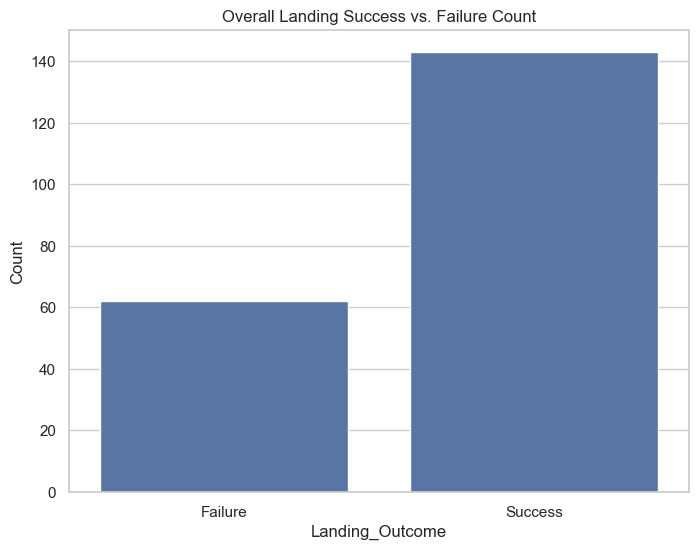

In [3]:
query = """
SELECT
    CASE WHEN class = 1 THEN 'Success' ELSE 'Failure' END AS Landing_Outcome,
    COUNT(*) AS Count
FROM launches
GROUP BY Landing_Outcome;
"""
success_rate_df = pd.read_sql(query, engine)

plt.figure(figsize=(8, 6))
sns.barplot(x='Landing_Outcome', y='Count', data=success_rate_df)
plt.title('Overall Landing Success vs. Failure Count')
plt.show()

### Q2: How does payload mass relate to landing success?

In [4]:
# Let's inspect our dataframe
print("--- DataFrame Info ---")
df.info()

print("\n--- First 5 Rows ---")
display(df.head())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   flight_number   205 non-null    int64              
 1   Date            205 non-null    datetime64[ns, UTC]
 2   BoosterVersion  205 non-null    object             
 3   PayloadMass     205 non-null    float64            
 4   Orbit           205 non-null    object             
 5   LaunchSite      205 non-null    object             
 6   Outcome         205 non-null    bool               
 7   Flights         205 non-null    float64            
 8   GridFins        205 non-null    bool               
 9   Reused          205 non-null    bool               
 10  Legs            205 non-null    bool               
 11  class           205 non-null    int64              
dtypes: bool(4), datetime64[ns, UTC](1), float64(2), int64(2), object(3)
m

,flight_number,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,class
0,1,2006-03-24 22:30:00+00:00,FalconSat,20.000000,LEO,5e9e4502f5090995de566f86,False,1.0,False,False,False,0
1,2,2007-03-21 01:10:00+00:00,DemoSat,7842.388855,LEO,5e9e4502f5090995de566f86,False,1.0,False,False,False,0
2,3,2008-08-03 03:34:00+00:00,Trailblazer,7842.388855,LEO,5e9e4502f5090995de566f86,False,1.0,False,False,False,0
3,4,2008-09-28 23:15:00+00:00,RatSat,165.000000,LEO,5e9e4502f5090995de566f86,False,1.0,False,False,False,0
4,5,2009-07-13 03:35:00+00:00,RazakSat,200.000000,LEO,5e9e4502f5090995de566f86,False,1.0,False,False,False,0


In [5]:
# --- FINAL DIAGNOSTIC CELL ---

print("--- Step 1: Basic DataFrame Info ---")
df.info()
print("\n" + "="*50 + "\n")

print("--- Step 2: Head of Key Columns ---")
# Display the first 10 rows of the columns we care about
display(df[['PayloadMass', 'LaunchSite', 'Orbit', 'class']].head(10))
print("\n" + "="*50 + "\n")

print("--- Step 3: Count of Missing Values ---")
# Show the count of nulls in each column
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

print("--- Step 4: Value Counts for Categorical Columns ---")
# See what unique values exist in these columns
print("Value counts for 'LaunchSite':")
print(df['LaunchSite'].value_counts(dropna=False))
print("\n" + "-"*30 + "\n")

print("Value counts for 'Orbit':")
print(df['Orbit'].value_counts(dropna=False))
print("\n" + "-"*30 + "\n")

print("Value counts for 'class':")
print(df['class'].value_counts(dropna=False))
print("\n" + "="*50 + "\n")

--- Step 1: Basic DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   flight_number   205 non-null    int64              
 1   Date            205 non-null    datetime64[ns, UTC]
 2   BoosterVersion  205 non-null    object             
 3   PayloadMass     205 non-null    float64            
 4   Orbit           205 non-null    object             
 5   LaunchSite      205 non-null    object             
 6   Outcome         205 non-null    bool               
 7   Flights         205 non-null    float64            
 8   GridFins        205 non-null    bool               
 9   Reused          205 non-null    bool               
 10  Legs            205 non-null    bool               
 11  class           205 non-null    int64              
dtypes: bool(4), datetime64[ns, UTC](1), float64(2), int64(2

,PayloadMass,LaunchSite,Orbit,class
0,20.000000,5e9e4502f5090995de566f86,LEO,0
1,7842.388855,5e9e4502f5090995de566f86,LEO,0
2,7842.388855,5e9e4502f5090995de566f86,LEO,0
3,165.000000,5e9e4502f5090995de566f86,LEO,0
4,200.000000,5e9e4502f5090995de566f86,LEO,0
5,7842.388855,5e9e4501f509094ba4566f84,LEO,0
6,7842.388855,5e9e4501f509094ba4566f84,LEO,0
7,525.000000,5e9e4501f509094ba4566f84,LEO,0
8,400.000000,5e9e4501f509094ba4566f84,ISS,0
9,677.000000,5e9e4501f509094ba4566f84,ISS,0




--- Step 3: Count of Missing Values ---
flight_number     0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
class             0
dtype: int64


--- Step 4: Value Counts for Categorical Columns ---
Value counts for 'LaunchSite':
LaunchSite
5e9e4501f509094ba4566f84    112
5e9e4502f509094188566f88     58
5e9e4502f509092b78566f87     30
5e9e4502f5090995de566f86      5
Name: count, dtype: int64

------------------------------

Value counts for 'Orbit':
Orbit
VLEO       59
GTO        36
ISS        33
LEO        20
PO         15
SSO        13
Unknown    13
MEO         8
TLI         2
GEO         2
ES-L1       1
HEO         1
HCO         1
SO          1
Name: count, dtype: int64

------------------------------

Value counts for 'class':
class
1    143
0     62
Name: count, dtype: int64




### Q3: Has the success rate improved over the years?

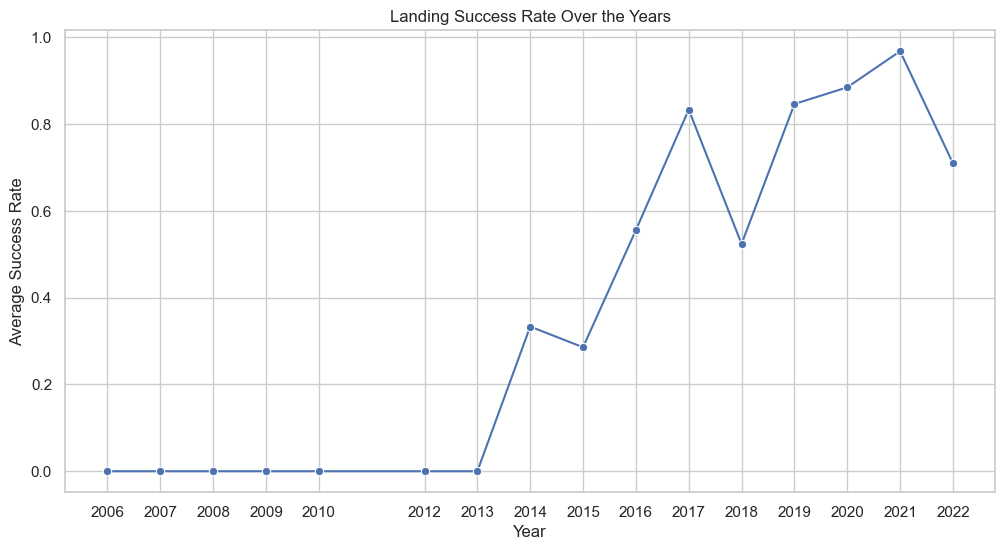

In [6]:

df['Year'] = df['Date'].dt.year
year_success_rate = df.groupby('Year')['class'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_success_rate, x='Year', y='class', marker='o')
plt.title('Landing Success Rate Over the Years')
plt.ylabel('Average Success Rate')
plt.xticks(year_success_rate['Year'])
plt.grid(True)
plt.show()

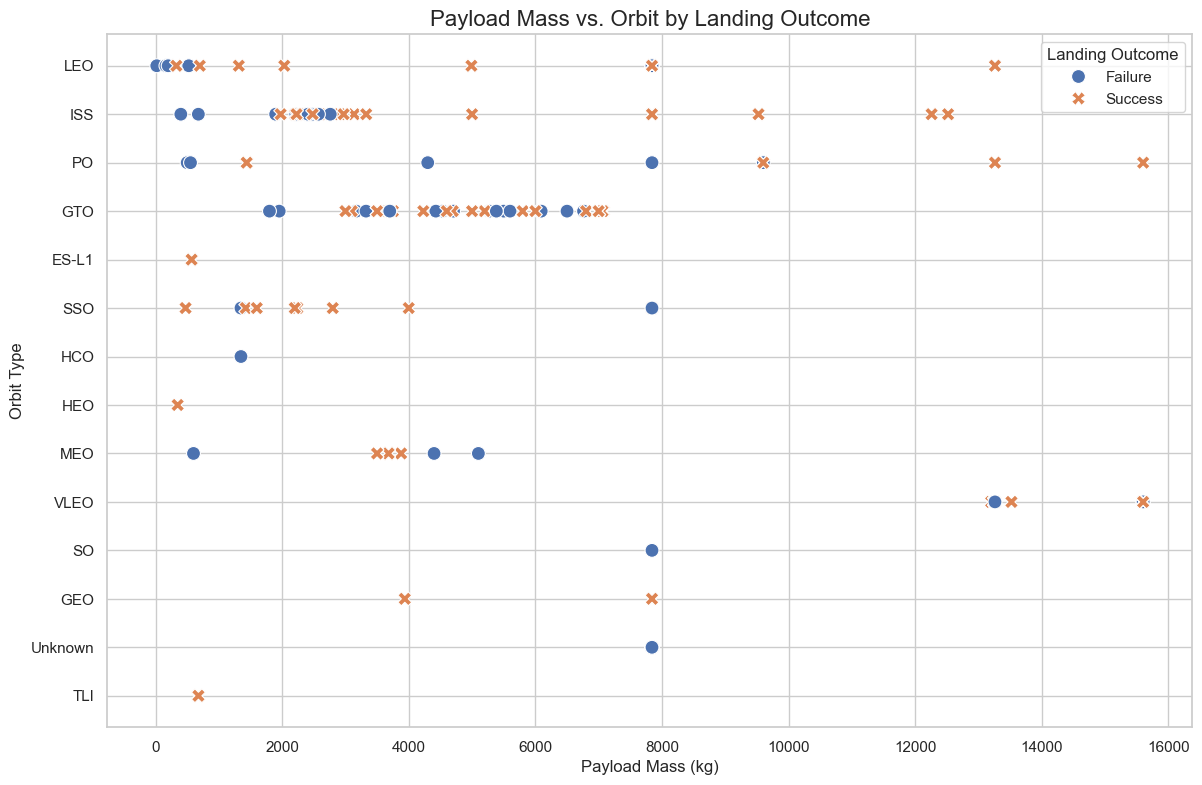

In [7]:
# Create a scatter plot to visualize Payload Mass vs. Orbit, colored by landing success.

# Ensure the 'class' column is treated as a category for coloring
df['class'] = df['class'].astype('category')

plt.figure(figsize=(14, 9))

sns.scatterplot(
    data=df, 
    x='PayloadMass', 
    y='Orbit', 
    hue='class',      # Color points based on landing success (0 or 1)
    style='class',    # Use different shapes for success/failure
    s=100             # Make the points larger
)

plt.title('Payload Mass vs. Orbit by Landing Outcome', fontsize=16)
plt.xlabel('Payload Mass (kg)', fontsize=12)
plt.ylabel('Orbit Type', fontsize=12)

# Create a more descriptive legend
# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
# Replace '0' and '1' with 'Failure' and 'Success'
new_labels = ['Failure', 'Success']
plt.legend(handles=handles, labels=new_labels, title='Landing Outcome')

plt.grid(True)
plt.show()